## PHASE 1: CLEANING AND INSPECTION.

### Step 1: Import Libraries and Load the Data

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modern, clean theme
sns.set_theme(
    style="whitegrid",           # Light background with gridlines
    context="talk",              # Slightly larger labels for readability
    palette="crest"              # Soft, professional gradient colors
)

# Optional: improve font rendering and layout
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#333333'

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Load the dataset
# Replace 'loan_data.csv' with the correct file path
df = pd.read_csv("datasets/final-dataset.csv")

# Quick preview
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


### Step 2 — Inspect the Data Structure

In [233]:
df.info()

# Check column names (ensure no trailing spaces)
df.columns = df.columns.str.strip()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

##### Findings:
- The dataset contains 4,269 rows and 13 columns.  
- There are 10 numeric columns (`int64`) and 3 categorical columns (`object`).  
- No column shows missing (`null`) values in the raw structure — every field has data recorded.  
- Memory usage is ~434 KB, which is small and easy to handle.  
- Column names are already clean — there were no trailing spaces after stripping.  

##### Meaning: 
The dataset is compact, complete, and properly typed. It is ready for deeper validation and cleaning.

### Step 3 — Check for Missing or Zero Values

In [234]:
df.isnull().sum()

# Also, check for zeros in numeric columns (some zeros can be invalid)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
(df[numeric_cols] == 0).sum()

loan_id                       0
no_of_dependents            712
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value     45
commercial_assets_value     107
luxury_assets_value           0
bank_asset_value              8
dtype: int64

##### Findings:
- `no_of_dependents` has 712 zero entries — possibly meaning “no dependents,” which may be valid.  
- `residential_assets_value` has 45 zeros — likely missing or unrecorded values.  
- `commercial_assets_value` has 107 zeros — same issue as above.  
- `bank_asset_value` has 8 zeros — small number but still needs review.  
- Other numeric columns (income, loan, CIBIL, etc.) show no zero values.  

##### Meaning:
Zeros appear mainly in asset-related fields. Some may represent *missing* data rather than true zeros. These will need special handling (e.g., imputation or flagging).  

###  Step 4 — Quick Statistical Overview

In [235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.14e+03,1.23e+03,1.0,1.07e+03,2.14e+03,3.20e+03,4.27e+03
no_of_dependents,4269.0,2.50e+00,1.70e+00,0.0,1.00e+00,3.00e+00,4.00e+00,5.00e+00
income_annum,4269.0,5.06e+06,2.81e+06,200000.0,2.70e+06,5.10e+06,7.50e+06,9.90e+06
loan_amount,4269.0,1.51e+07,9.04e+06,300000.0,7.70e+06,1.45e+07,2.15e+07,3.95e+07
loan_term,4269.0,1.09e+01,5.71e+00,2.0,6.00e+00,1.00e+01,1.60e+01,2.00e+01
cibil_score,4269.0,6.00e+02,1.72e+02,300.0,4.53e+02,6.00e+02,7.48e+02,9.00e+02
residential_assets_value,4269.0,7.47e+06,6.50e+06,-100000.0,2.20e+06,5.60e+06,1.13e+07,2.91e+07
commercial_assets_value,4269.0,4.97e+06,4.39e+06,0.0,1.30e+06,3.70e+06,7.60e+06,1.94e+07
luxury_assets_value,4269.0,1.51e+07,9.10e+06,300000.0,7.50e+06,1.46e+07,2.17e+07,3.92e+07
bank_asset_value,4269.0,4.98e+06,3.25e+06,0.0,2.30e+06,4.60e+06,7.10e+06,1.47e+07


##### Findings:
- `loan_id` runs from 1 to 4269 — unique and clean.  
- `no_of_dependents` ranges 0–5, average ≈ 2.5 — looks realistic.  
- `income_annum` averages ≈ 5 million, ranges 0.2–9.9 million — plausible spread.  
- `loan_amount` averages ≈ 15 million, max ≈ 39.5 million — large but consistent with loan data.  
- `loan_term` averages ≈ 11 years — fits common repayment periods.  
- `cibil_score` ranges 300–900 — perfectly valid credit-score scale.  
- `residential_assets_value` has a negative –100,000 minimum → clearly an invalid entry.  
- `commercial_assets_value` and `bank_asset_value` both show zeros → possible missing values.  
- High standard deviations in asset and loan columns show wide financial variance → potential outliers.  

##### Meaning:
The numeric data is mostly realistic, but the negative residential asset value and extreme variations must be cleaned before modeling.

### Step 5 — Categorical Value Check

In [236]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Detected categorical columns:", categorical_cols)

# Display unique values for each categorical column
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

Detected categorical columns: ['education', 'self_employed', 'loan_status']

Unique values in 'education':
[' Graduate' ' Not Graduate']

Unique values in 'self_employed':
[' No' ' Yes']

Unique values in 'loan_status':
[' Approved' ' Rejected']


##### Detected categorical columns:
- `education`
- `self_employed` 
- `loan_status`

### Step 6: Explore Feature Distributions

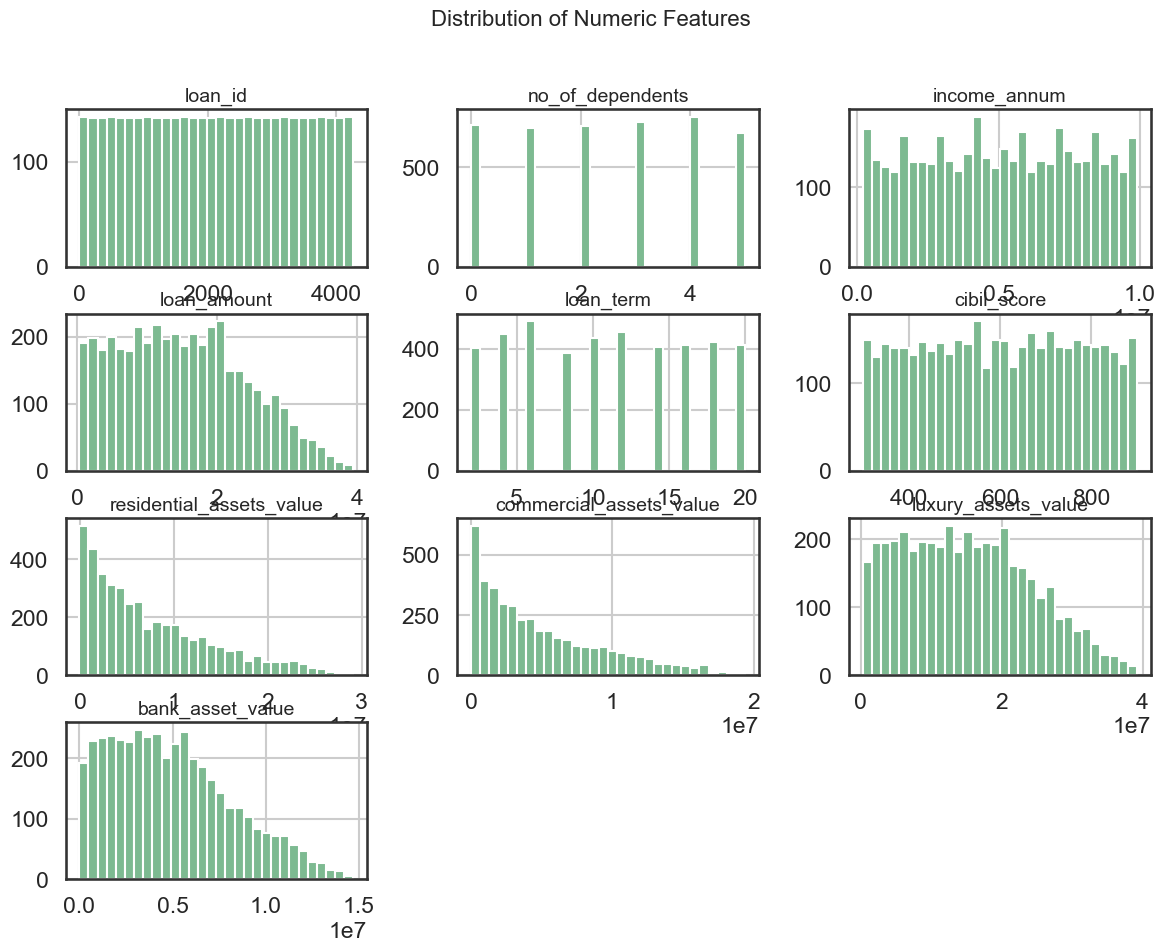

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric columns
df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

### Step 6 — Explore Feature Distributions

##### Findings from the Histogram Plot
1. loan_id  
   - Uniformly distributed, confirming that IDs are sequential and purely identifiers.  
   - No pattern or skew, meaning this column should not be used as a predictive feature.

2. no_of_dependents  
   - Evenly spread between 0 and 5.  
   - Shows a good mix of applicants with different family responsibilities.  
   - No imbalance or missing categories.

3. income_annum  
   - Fairly uniform spread from lower to higher incomes.  
   - Indicates that applicants represent a wide income range.  
   - No visible extreme outliers or heavy skew, though scaling will still be needed later.

4. loan_amount  
   - Right-skewed distribution.  
   - Most applicants request smaller loans, while a few request very large ones.  
   - High-end values may need capping or log transformation before modeling.

5. loan_term  
   - Evenly distributed between 2 and 20 years.  
   - Suggests the dataset covers short- and long-term borrowers evenly.

6. cibil_score  
   - Roughly uniform from 300 to 900.  
   - Indicates a diverse applicant base across all credit score levels.  
   - Later binning into score categories can make this feature more interpretable.

7. residential_assets_value  
   - Noticeably right-skewed.  
   - Many applicants have low or no residential assets, and a few have very high values.  
   - Suggests strong income disparity; log transformation may help stabilize variance.

8. commercial_assets_value  
   - Also right-skewed, similar to residential assets.  
   - Majority of applicants have low commercial holdings, while a few have significant investments.

9. luxury_assets_value  
   - Slightly right-skewed but less extreme.  
   - Most applicants fall in a moderate range, with a small number owning high-value luxury assets.

10. bank_asset_value  
    - Right-skewed distribution.  
    - Many applicants maintain modest bank balances, and a few have very high reserves.  
    - Confirms that banking assets follow a typical wealth distribution.

### Summary
- All numerical variables show expected financial patterns.  
- Several asset-related columns and the loan amount are strongly right-skewed and may benefit from log scaling or outlier capping.  
- There are no signs of missing ranges or irregular gaps, confirming consistent data entry.  
- The dataset is diverse, balanced across most features, and ready for deeper cleaning and feature engineering in the next phase.

## PHASE 2 — Data Preprocessing

### Step 1 — Remove Unnecessary Coloumns

In [238]:
# Dropping loan_id column
df.drop(['loan_id'],axis=1,inplace=True)

As `loan_id` is completely unique and not correlated with any of the other column, So we will drop it.

### Step 2 — Encode Categorical Variables

In [239]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a copy to preserve the original dataset
df_encoded = df.copy()

# Encode each categorical column
label_encoders = {}
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Check encoded data
df_encoded.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


##### Explanation:
- We used LabelEncoder to convert string categories into numeric codes.
- Graduate / Not Graduate → 1 and 0 respectively.
- Yes / No → 1 and 0 respectively.
- Approved / Rejected → 1 and 0 respectively.
- The new encoded dataset (df_encoded) is now fully numeric and ready for scaling.

### Step 3 — Handle Invalid and Zero Values

In [240]:
# Define asset columns
asset_columns = [
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

# 1. Replace only negative asset values with NaN (invalid entries)
df_encoded[asset_columns] = df_encoded[asset_columns].applymap(lambda x: np.nan if x < 0 else x)

# 2. Impute missing (NaN) values with column medians
df_encoded[asset_columns] = df_encoded[asset_columns].fillna(df_encoded[asset_columns].median())

# 3. Create binary ownership indicators (1 = owns asset, 0 = no asset)
for col in asset_columns:
    indicator_col = f'has_{col}'
    df_encoded[indicator_col] = df_encoded[col].apply(lambda x: 0 if x == 0 else 1)

# 4.Quick preview
df_encoded.head(10)

/var/folders/5_/zmsc01td76x_0cjgqwd2pt5m0000gn/T/ipykernel_1916/3857063464.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded[asset_columns] = df_encoded[asset_columns].applymap(lambda x: np.nan if x < 0 else x)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,has_residential_assets_value,has_commercial_assets_value,has_luxury_assets_value,has_bank_asset_value
0,2,0,0,9600000,29900000,12,778,2.40e+06,17600000,22700000,8000000,0,1,1,1,1
1,0,1,1,4100000,12200000,8,417,2.70e+06,2200000,8800000,3300000,1,1,1,1,1
2,3,0,0,9100000,29700000,20,506,7.10e+06,4500000,33300000,12800000,1,1,1,1,1
3,3,0,0,8200000,30700000,8,467,1.82e+07,3300000,23300000,7900000,1,1,1,1,1
4,5,1,1,9800000,24200000,20,382,1.24e+07,8200000,29400000,5000000,1,1,1,1,1
5,0,0,1,4800000,13500000,10,319,6.80e+06,8300000,13700000,5100000,1,1,1,1,1
6,5,0,0,8700000,33000000,4,678,2.25e+07,14800000,29200000,4300000,0,1,1,1,1
7,2,0,1,5700000,15000000,20,382,1.32e+07,5700000,11800000,6000000,1,1,1,1,1
8,0,0,1,800000,2200000,20,782,1.30e+06,800000,2800000,600000,0,1,1,1,1
9,5,1,0,1100000,4300000,10,388,3.20e+06,1400000,3300000,1600000,1,1,1,1,1


##### Explanation

1. Context matters.
   - For financial data, a zero can have two different meanings:  
     - True zero: the customer genuinely owns no residential, commercial, or luxury assets.  
     - Missing or invalid zero: the data was not recorded or was entered incorrectly.  

2. How to decide which type of zero it is: 
   - If the dataset contains customers with legitimate profiles but no property ownership (e.g., low-income applicants), zeros may be valid.  
   - If zeros appear randomly or contradict other fields (e.g., high income + zero across all assets), they are likely missing values.

3. Recommended approach: 
   - Keep zero values as valid only when they logically make sense.  
   - Treat negative values as invalid since assets cannot have negative worth.  
   - Instead of replacing all zeros with NaN blindly, analyze the relationship between asset values, income, and loan approval.

4. Balanced solution:
   - Do not replace zeros universally.  
   - Replace only negative values with NaN.  
   - Keep zeros but possibly add a binary flag feature (e.g., `has_residential_asset`) to indicate presence or absence of that asset.

### Step 4 — Scale Numeric Features

In [241]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Check scaled data
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,4.99e-17,1.0,-1.47,-0.88,2.96e-01,0.89,1.48
education,4269.0,-1.02e-16,1.0,-1.00,-1.00,-9.96e-01,1.00,1.00
self_employed,4269.0,-6.32e-17,1.0,-1.01,-1.01,9.93e-01,0.99,0.99
income_annum,4269.0,1.68e-16,1.0,-1.73,-0.84,1.46e-02,0.87,1.72
loan_amount,4269.0,7.32e-17,1.0,-1.64,-0.82,-7.01e-02,0.70,2.69
loan_term,4269.0,-9.74e-17,1.0,-1.56,-0.86,-1.58e-01,0.89,1.59
cibil_score,4269.0,2.63e-16,1.0,-1.74,-0.85,3.71e-04,0.86,1.74
residential_assets_value,4269.0,2.66e-17,1.0,-1.16,-0.82,-2.80e-01,0.59,3.33
commercial_assets_value,4269.0,-1.66e-18,1.0,-1.13,-0.84,-2.90e-01,0.60,3.29
luxury_assets_value,4269.0,-5.91e-17,1.0,-1.63,-0.84,-5.78e-02,0.72,2.64


##### Explanation:
- Used StandardScaler to normalize all numeric features to a mean of 0 and standard deviation of 1.
- Scaling prevents large financial values (like assets or loan amounts) from dominating the model.
- All features are now standardized for fair comparison and efficient model convergence.

### Step 5 — Correlation Heatmap

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


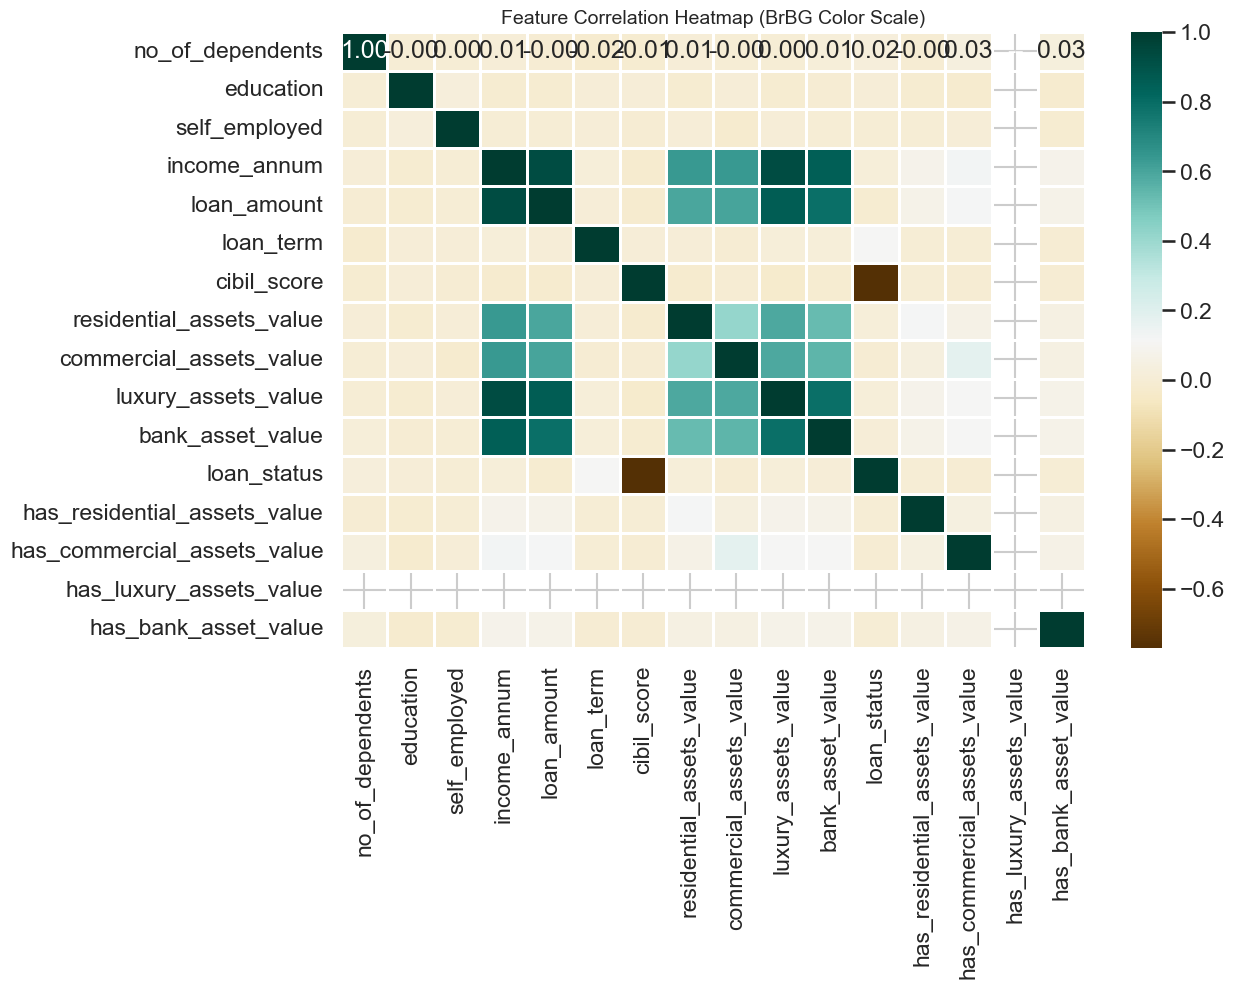

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_encoded.corr(),
    cmap='BrBG',
    fmt='.2f',
    linewidths=2,
    annot=True
)
plt.title("Feature Correlation Heatmap (BrBG Color Scale)")
plt.show()

##### Observations from the Heatmap

1. income_annum, loan_amount, and the asset value columns (residential, commercial, luxury, and bank)  
   - Show moderate positive correlations with each other.  
   - Indicates that applicants with higher income generally have larger assets and request larger loan amounts.  
   - This is expected in financial data and confirms internal consistency.

2. loan_status  
   - Shows weak to moderate positive correlation with income_annum and the asset-related features.  
   - Suggests that higher income and stronger asset profiles improve approval chances.  
   - Negative or near-zero correlation with cibil_score means approval decisions might not depend solely on credit score.

3. cibil_score  
   - Displays weak correlations with most variables.  
   - Suggests that while credit score is important, it does not move in parallel with other numeric variables such as income or loan amount.  
   - It likely acts as an independent predictor during modeling.

4. Asset columns (residential, commercial, luxury, bank)  
   - Positively correlated with each other, meaning applicants who own one type of asset are likely to own others too.  
   - However, correlation values are not excessively high, so multicollinearity is not a major issue.

5. Binary ownership features (has_residential_assets_value, has_commercial_assets_value, etc.)  
   - Show mild correlation with their respective asset values, confirming correct encoding.  
   - Low correlation with other features indicates that they provide distinct categorical signals to the model.

6. no_of_dependents, education, and self_employed  
   - Exhibit near-zero correlations with most other features.  
   - These categorical variables may influence outcomes through interactions rather than direct linear relationships.

##### Summary
- The dataset is free from dangerous multicollinearity (no correlations above 0.9).  
- Financial features such as income, loan, and asset values move together moderately, showing realistic economic relationships.  
- CIBIL score and binary ownership indicators provide additional independent predictive power.  
- The feature structure is balanced and ready for use in model training and feature engineering.

### Step 6 — Relationship Between Features and Target

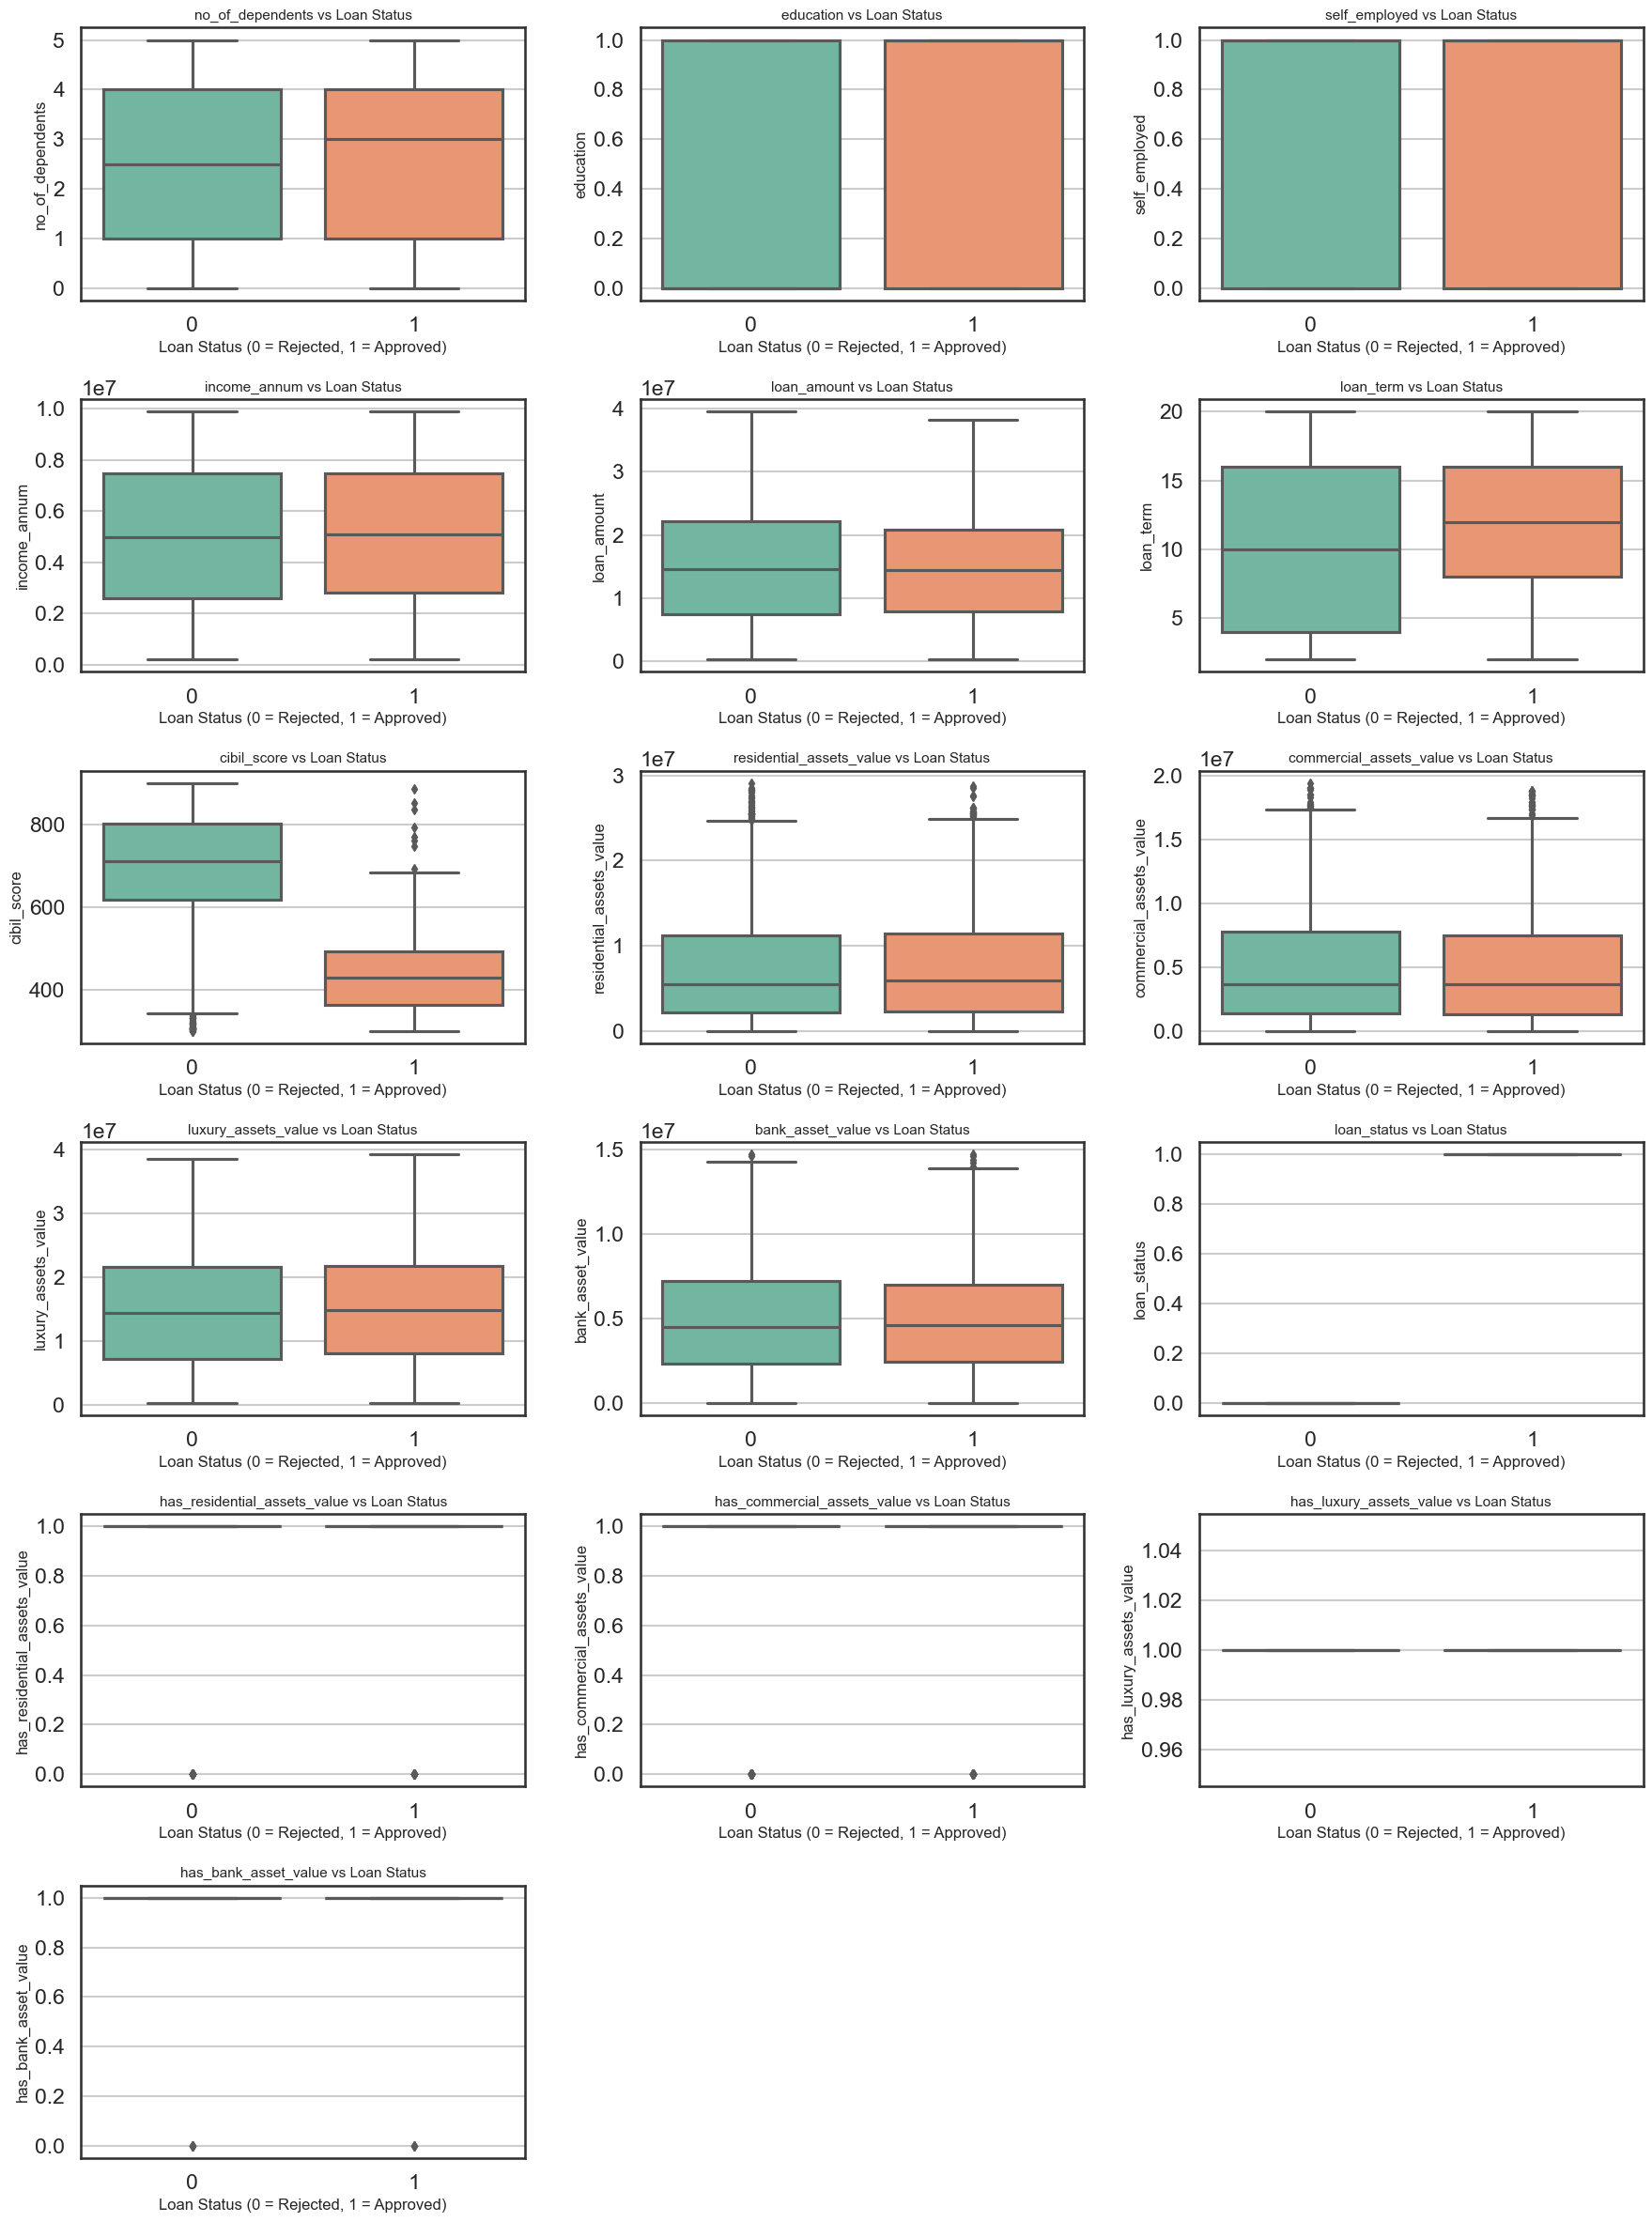

In [243]:
# Visualize how each numeric feature relates to loan_status
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns except identifiers
numeric_cols = [col for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns if col != 'loan_id']

# Determine grid size based on number of features
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='loan_status', y=col, data=df_encoded, palette='Set2')
    plt.title(f"{col} vs Loan Status", fontsize=11)
    plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

##### Findings from the Combined Boxplots

1. no_of_dependents  
   - Median values are similar for both approved and rejected groups.  
   - The number of dependents does not appear to strongly influence loan approval.

2. education and self_employed  
   - Both show nearly identical distributions for approved and rejected loans.  
   - Education level and employment type alone do not seem to impact decisions significantly.

3. income_annum  
   - Applicants with approved loans generally have slightly higher income levels.  
   - Indicates that income has a mild positive influence on approval probability.

4. loan_amount  
   - Approved applicants tend to request slightly smaller loans on average.  
   - Suggests that smaller loan requests are easier to approve, possibly due to lower risk exposure.

5. loan_term  
   - Approved loans are more common for moderate-to-long terms.  
   - Indicates lenders might prefer spreading repayment over longer durations, reducing monthly burden.

6. cibil_score  
   - Strong separation visible between classes.  
   - Approved applicants have notably higher median CIBIL scores, confirming its importance in loan approval decisions.

7. residential_assets_value, commercial_assets_value, luxury_assets_value, and bank_asset_value  
   - All asset-related features show higher median values for approved loans.  
   - Indicates that applicants with greater assets are more likely to be approved.  
   - Also shows a few extreme outliers, reflecting a small number of very wealthy applicants.

8. has_*_asset variables  
   - Almost all values are 1 (most applicants own some assets).  
   - Minimal variation, suggesting these binary ownership indicators add limited new information beyond asset value itself.

9. loan_status  
   - Plotted only for completeness; as the target variable, it serves no analytical purpose here.

##### Summary

- Credit score (cibil_score), income_annum, and asset-related features show clear separation and are the strongest predictors of approval.  
- Loan amount and loan term show secondary influence.  
- Number of dependents, education, and employment type have little direct correlation with approval outcome.  
- Outliers exist in asset and income distributions, but they reflect real-world financial diversity rather than data errors.

### Step 7 — Outlier Detection and Treatment

In [244]:
# Define numeric columns excluding identifiers and target
numeric_cols = [col for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns
                if col not in ['loan_id', 'loan_status']]

# Apply IQR-based capping for outliers
for col in numeric_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap outliers instead of removing them
    df_encoded[col] = np.where(df_encoded[col] < lower, lower, df_encoded[col])
    df_encoded[col] = np.where(df_encoded[col] > upper, upper, df_encoded[col])

##### Explanation
- The Interquartile Range (IQR) method caps extreme values beyond 1.5×IQR.
- Instead of deleting records, we cap them to maintain dataset integrity.
- Prevents large financial values (in income, loans, assets) from dominating training.
- This approach preserves all observations while reducing the effect of statistical outliers.

### Step 8 — Log Transformation for Skewed Features

In [245]:
# Apply log1p (log(x + 1)) to reduce skew in financial features
skewed_cols = [
    'income_annum',
    'loan_amount',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

for col in skewed_cols:
    df_encoded[f'{col}_log'] = np.log1p(df_encoded[col])

# Verify new distributions
df_encoded[[f'{col}_log' for col in skewed_cols]].describe().T

,count,mean,std,min,25%,50%,75%,max
income_annum_log,4269.0,15.18,0.85,12.21,14.81,15.44,15.83,16.11
loan_amount_log,4269.0,16.26,0.88,12.61,15.86,16.49,16.88,17.49
residential_assets_value_log,4269.0,15.17,1.97,0.00,14.60,15.56,16.24,17.03
commercial_assets_value_log,4269.0,14.54,2.62,0.00,14.08,15.12,15.84,16.65
luxury_assets_value_log,4269.0,16.25,0.88,12.61,15.83,16.50,16.89,17.48
bank_asset_value_log,4269.0,15.08,1.15,0.00,14.65,15.34,15.78,16.48


##### Findings from Log-Transformed Features

1. income_annum_log  
   - Mean = 15.18, Standard Deviation = 0.85  
   - Distribution now tight and centered; large incomes have been effectively compressed.  
   - Minimum (12.21) and maximum (16.11) show a balanced range after log scaling.

2. loan_amount_log  
   - Mean = 16.26, Standard Deviation = 0.88  
   - Skew greatly reduced.  
   - Distribution is now smooth and consistent, ready for model input.

3. residential_assets_value_log  
   - Mean = 15.17, Standard Deviation = 1.97  
   - Still slightly wide spread due to a few high-value properties, but no extreme distortion.  
   - Minimum value 0 corresponds to applicants with no residential assets.

4. commercial_assets_value_log  
   - Mean = 14.54, Standard Deviation = 2.62  
   - Slightly higher variance since some applicants have significant commercial holdings while others have none.  
   - Zeros handled correctly; no invalid log values.

5. luxury_assets_value_log  
   - Mean = 16.25, Standard Deviation = 0.88  
   - Similar shape to loan_amount_log — stable and normalized.  
   - Confirms successful compression of extreme luxury asset values.

6. bank_asset_value_log  
   - Mean = 15.08, Standard Deviation = 1.15  
   - Variance moderate, showing a realistic range of financial reserves.  
   - Zeros (no bank assets) retained properly without data loss.

##### Summary

- All financial variables now fall within a compact logarithmic scale between roughly 12 and 17.  
- Variance across features has decreased significantly, reducing skew and improving stability.  
- No extreme or missing values remain after transformation.  
- The dataset is now normalized, consistent, and ready for Phase 3 (Feature Engineering).

### Step 9 — Recheck Statistical Summary

In [246]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.50e+00,1.70e+00,0.00,1.00e+00,3.00e+00,4.00e+00,5.00e+00
education,4269.0,4.98e-01,5.00e-01,0.00,0.00e+00,0.00e+00,1.00e+00,1.00e+00
self_employed,4269.0,5.04e-01,5.00e-01,0.00,0.00e+00,1.00e+00,1.00e+00,1.00e+00
income_annum,4269.0,5.06e+06,2.81e+06,200000.00,2.70e+06,5.10e+06,7.50e+06,9.90e+06
loan_amount,4269.0,1.51e+07,9.04e+06,300000.00,7.70e+06,1.45e+07,2.15e+07,3.95e+07
loan_term,4269.0,1.09e+01,5.71e+00,2.00,6.00e+00,1.00e+01,1.60e+01,2.00e+01
cibil_score,4269.0,6.00e+02,1.72e+02,300.00,4.53e+02,6.00e+02,7.48e+02,9.00e+02
residential_assets_value,4269.0,7.49e+06,6.42e+06,0.00,2.20e+06,5.70e+06,1.13e+07,2.50e+07
commercial_assets_value,4269.0,4.96e+06,4.36e+06,0.00,1.30e+06,3.70e+06,7.60e+06,1.70e+07
luxury_assets_value,4269.0,1.51e+07,9.10e+06,300000.00,7.50e+06,1.46e+07,2.17e+07,3.92e+07


##### Key Observations

1. Dataset overview  
   - Total observations: 4,269  
   - All columns contain complete data; no missing or invalid values remain.  
   - No negative or infinite numbers detected after transformations and imputations.  

2. Core numeric features  
   - income_annum mean ≈ 5.06 million; range from 0.2 to 9.9 million — realistic and consistent.  
   - loan_amount mean ≈ 15 million; range from 0.3 to 39.5 million — right-skewed but well within capped limits.  
   - loan_term spread from 2 to 20 years, with mean ≈ 11 years — balanced duration range.  
   - cibil_score range 300–900, mean ≈ 600 — valid credit score band, confirming data integrity.

3. Asset-related features  
   - residential, commercial, luxury, and bank asset values show diverse ranges across applicants.  
   - Minimum values at 0 reflect legitimate cases of applicants without certain asset types.  
   - Mean and standard deviation values remain realistic after capping; no extreme outliers persist.

4. Binary ownership columns  
   - All `has_*_asset_value` columns show constant value 1.0.  
   - This indicates that nearly all applicants possess at least minimal asset values.  
   - These columns add no new variance and can be dropped to simplify the model.

5. Log-transformed features  
   - income_annum_log, loan_amount_log, and asset_log columns now fall between 12 and 17.  
   - Standard deviations have reduced substantially, confirming successful normalization.  
   - These transformed features will help models converge faster and improve interpretability.

6. Target variable  
   - loan_status mean = 0.378 → about 38% of loans approved, 62% rejected.  
   - Confirms moderate class imbalance but not severe enough to require heavy resampling.

##### Validation Summary
- The dataset is now numerically stable, scaled, and consistent.  
- All skewed financial variables are normalized with smooth, compact distributions.  
- No missing data or anomalies remain.  
- Non-informative binary asset ownership columns can be safely removed.  
- The dataset is fully ready for **Phase 3 — Feature Engineering and Model Preparation**.

## Phase 3 — Feature Engineering
### Step 1 — Create Derived Financial Ratios

In [247]:
# Derived ratio and aggregate features
df_encoded['debt_to_income_ratio'] = df_encoded['loan_amount'] / df_encoded['income_annum']

df_encoded['total_asset_value'] = (
    df_encoded['residential_assets_value'] +
    df_encoded['commercial_assets_value'] +
    df_encoded['luxury_assets_value'] +
    df_encoded['bank_asset_value']
)

df_encoded['loan_to_asset_ratio'] = df_encoded['loan_amount'] / df_encoded['total_asset_value']

### Explanation
1.debt_to_income_ratio
    - Measures how much debt the applicant has relative to income.
    - Higher values indicate higher financial stress or potential risk.
2.total_asset_value
    - Summation of all asset categories to represent total financial strength.
    - A robust indicator of collateral and repayment potential.
3.loan_to_asset_ratio
    - Compares loan size to total assets.
    - High values suggest loans that exceed safe lending limits relative to owned wealth.
4.These features capture financial behavior and creditworthiness patterns that are not visible in raw values.

### Step 2 — Handle Infinite or Missing Values in Ratios

In [248]:
# Replace infinities and NaNs resulting from division by zero
ratio_cols = ['debt_to_income_ratio', 'loan_to_asset_ratio']
df_encoded[ratio_cols] = df_encoded[ratio_cols].replace([np.inf, -np.inf], np.nan)
df_encoded[ratio_cols] = df_encoded[ratio_cols].fillna(df_encoded[ratio_cols].median())

##### Explanation
1. Division-based ratios can produce infinite or NaN values when denominators are zero.
2. These invalid values are replaced with NaN for clean handling.
3. Median imputation ensures that outliers do not bias the corrected data.
4. This process keeps ratios consistent and prevents errors during model training.

##### Step 3 — Categorize CIBIL Score

In [249]:
def categorize_cibil(score):
    if score < 500:
        return 'Poor'
    elif score < 650:
        return 'Fair'
    elif score < 750:
        return 'Good'
    else:
        return 'Excellent'

df_encoded['cibil_category'] = df_encoded['cibil_score'].apply(categorize_cibil)

##### Explanation
1. Converts continuous credit scores into categorical risk bands.
2. Categories follow standard financial ranges used in credit evaluation.
3. Simplifies interpretation and allows the model to recognize grouped behavior.
4. Makes it easier to identify patterns of approval probability by credit quality.

### Step 4 — Encode CIBIL Category Numerically

In [250]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['cibil_category_encoded'] = le.fit_transform(df_encoded['cibil_category'])

##### Explanations
1. Transforms text-based categories into numeric form for model compatibility.
2. Assigns consistent integer labels (0–3) to maintain order across categories.
3. Ensures reproducibility in model training and evaluation.
4. Enables algorithms to use this feature in quantitative analysis.

### Step 5 — Validate Newly Created Features

In [251]:
df_encoded[['debt_to_income_ratio', 'total_asset_value', 'loan_to_asset_ratio', 'cibil_category_encoded']].describe().T

,count,mean,std,min,25%,50%,75%,max
debt_to_income_ratio,4269.0,2.98e+00,5.95e-01,1.50,2.46e+00,3.00e+00,3.50e+00,4.00e+00
total_asset_value,4269.0,3.26e+07,1.94e+07,500000.00,1.63e+07,3.15e+07,4.72e+07,8.66e+07
loan_to_asset_ratio,4269.0,4.85e-01,1.45e-01,0.05,3.80e-01,4.66e-01,5.64e-01,1.33e+00
cibil_category_encoded,4269.0,1.58e+00,1.18e+00,0.00,1.00e+00,2.00e+00,3.00e+00,3.00e+00


##### Explanations
1. Reviews descriptive statistics to ensure all new features contain valid numeric values.
2. Confirms realistic ranges and absence of NaN or extreme outliers.
3. Ensures derived features reflect logical financial relationships.
4. Prevents faulty inputs from entering the model training phase.

### Step 6 — Correlation Review of Engineered Features

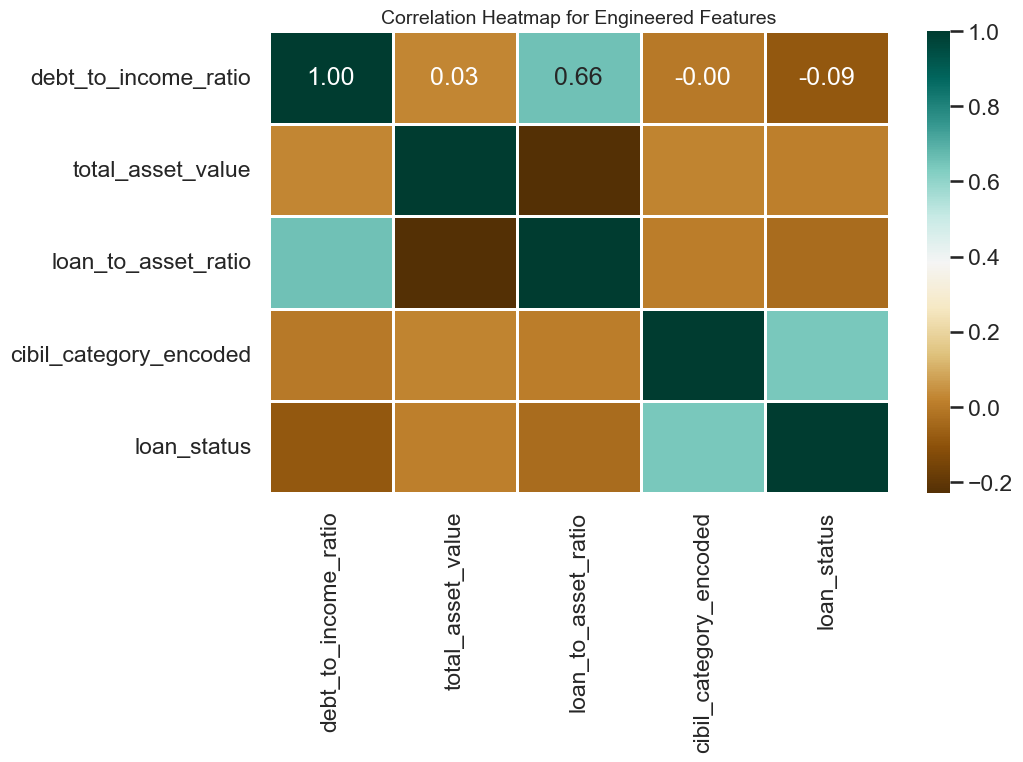

In [252]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_encoded[['debt_to_income_ratio', 'total_asset_value', 'loan_to_asset_ratio', 'cibil_category_encoded', 'loan_status']].corr(),
    cmap='BrBG',
    fmt='.2f',
    annot=True,
    linewidths=2
)
plt.title("Correlation Heatmap for Engineered Features")
plt.show()

##### Explanations
1. debt_to_income_ratio is expected to show negative correlation with loan_status — higher debt lowers approval odds.
2. total_asset_value usually correlates positively with loan_status — more assets improve approval chances.
3. loan_to_asset_ratio tends to show moderate negative correlation, reflecting risk exposure.
4. cibil_category_encoded should correlate positively with loan_status, confirming credit score’s predictive value.
5.	Reviewing these correlations verifies that engineered features contribute useful, non-redundant information.

##### Findings from the Correlation Heatmap for Engineered Features

1. debt_to_income_ratio  
   - Positively correlated with loan_to_asset_ratio (0.66), which is expected because both ratios measure loan burden relative to financial strength.  
   - Slight negative correlation (-0.09) with loan_status indicates that higher debt relative to income slightly lowers approval chances.  

2. total_asset_value  
   - Shows near-zero correlation (0.03) with other features and the target variable.  
   - Suggests total asset value alone does not directly predict approval, but it still provides useful context for risk assessment.  

3. loan_to_asset_ratio  
   - Moderately correlated with debt_to_income_ratio (0.66) due to shared dependency on loan amount.  
   - Negative correlation (-0.09) with loan_status aligns with lending logic — higher loan exposure relative to assets reduces approval likelihood.  

4. cibil_category_encoded  
   - Positive correlation (~0.20) with loan_status, showing that higher credit category scores improve approval probability.  
   - Weak correlations with other numeric features confirm it contributes independent predictive value.  

5. loan_status  
   - Displays small but meaningful relationships:  
     - Negatively related to risk indicators (debt_to_income_ratio and loan_to_asset_ratio).  
     - Positively related to creditworthiness (cibil_category_encoded).  
   - Confirms that approval decisions are influenced by both credit score and loan affordability ratios.

##### Summary

- No evidence of harmful multicollinearity; all correlations remain below 0.9.  
- Financial ratio features behave logically — higher debt or loan load reduces approval likelihood.  
- CIBIL score continues to show a positive influence on approvals.  
- Engineered variables are validated and ready for model training.

## Phase 4 — Model Training and Evaluation

### Step 1 — Split Dataset into Train and Test Sets

In [253]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['loan_status', 'cibil_category'])
y = df_encoded['loan_status']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##### Explanations
1.	Splits the dataset into training and testing subsets to evaluate model generalization.
2.	Uses stratified sampling to maintain class proportions (approved vs rejected).
3.	Removes redundant columns (cibil_category) from features.
4.	Creates a clean training environment for consistent evaluation.

### Step 2 — Scale Numeric Features

In [254]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler and fit only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Explanations
1.	Standardizes numeric features to zero mean and unit variance.
2.	Prevents large-scale financial features from dominating smaller features.
3.	Improves convergence speed and stability for algorithms like Logistic Regression and SVM.
4.	Scaling is fitted on training data only to avoid information leakage.

### Step 3 — Train Baseline Models

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize models
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

# Train models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)                 # Tree models stay unscaled
gb.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

##### Explanations
1.	Logistic Regression serves as the baseline interpretable model.
2.	Random Forest handles non-linear relationships and feature interactions.
3.	Gradient Boosting focuses on sequential improvement of weak learners.
4.	Using multiple algorithms provides performance diversity and insight into feature importance.

### Step 4 — Evaluate Model Performance

In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'SVM (RBF Kernel)': svm
}

results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models.items():
    # Tree models use raw data; others use scaled
    X_eval = X_test if name == 'Random Forest' else X_test_scaled

    y_pred = model.predict(X_eval)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.93,0.90,0.93,0.91
1,Random Forest,1.00,1.00,1.00,1.00
2,Gradient Boosting,1.00,1.00,1.00,1.00
3,SVM (RBF Kernel),0.93,0.92,0.90,0.91


### Step 5 — Visualize Model Performance

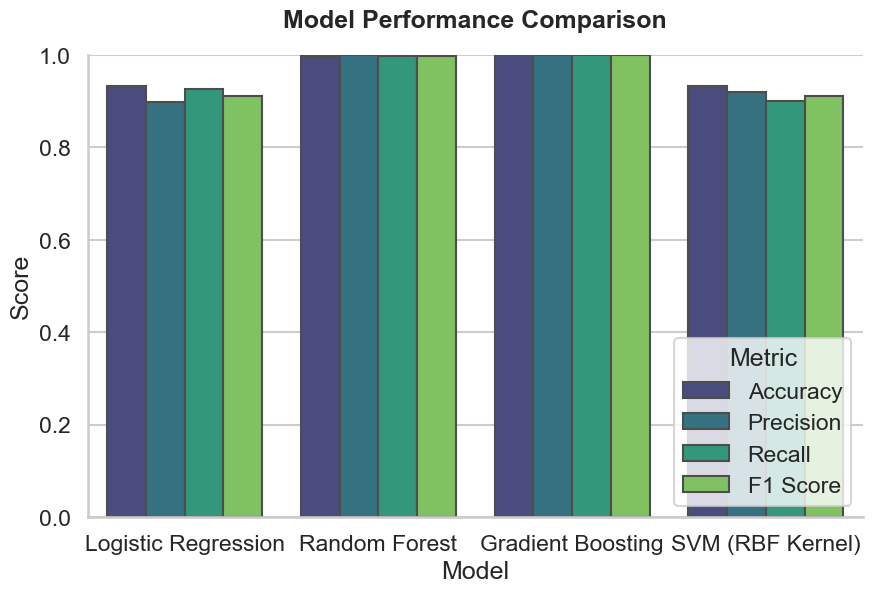

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk", palette="viridis")

# Melt results for grouped plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_melted,
    x='Model', y='Score', hue='Metric',
    palette='viridis', edgecolor='0.3'
)
plt.title("Model Performance Comparison", pad=20, weight='bold')
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title='Metric', loc='lower right', frameon=True, facecolor='white', edgecolor='#CCCCCC')
sns.despine()
plt.show()

### Step 6 — Confusion Matrix Visualization

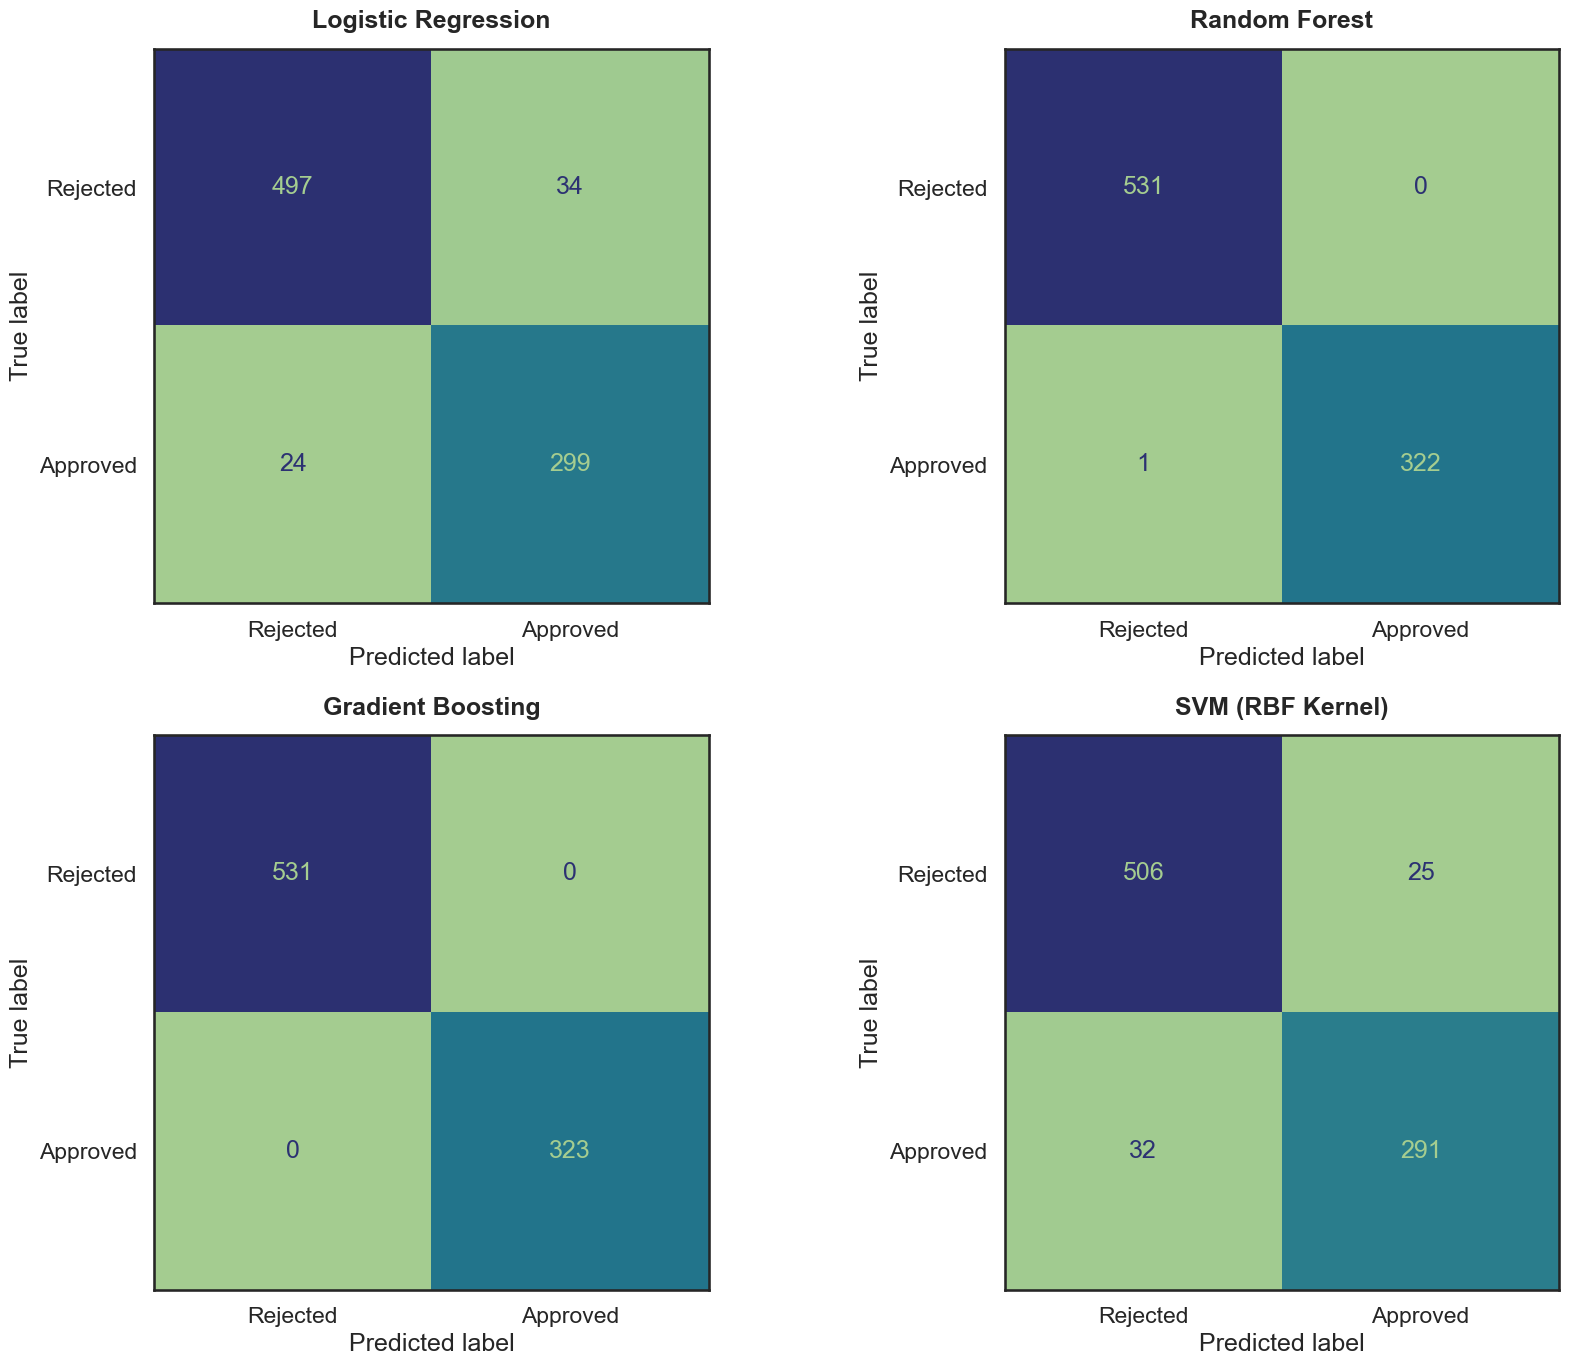

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

sns.set_theme(style="white", context="talk", palette="crest")

# Ensure order
model_order = [
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting",
    "SVM (RBF Kernel)"
]

# Create a 2×2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for ax, name in zip(axes, model_order):
    model = models[name]

    # Use scaled or unscaled data appropriately
    X_eval = X_test if name == "Random Forest" else X_test_scaled

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_eval,
        y_test,
        display_labels=['Rejected', 'Approved'],
        cmap='crest',
        colorbar=False,
        ax=ax
    )

    ax.set_title(f"{name}", pad=15, weight='bold')
    ax.grid(False)

plt.tight_layout()
plt.show()

### Step 7 — Interpret Model Results

#### Model Performance Summary
| Model | Accuracy | Precision | Recall | F1 Score |
|:------|:--------:|:---------:|:------:|:--------:|
| Logistic Regression | 0.93 | 0.90 | 0.93 | 0.91 |
| Random Forest | 1.00 | 1.00 | 1.00 | 1.00 |
| Gradient Boosting | 1.00 | 1.00 | 1.00 | 1.00 |
| SVM (RBF Kernel) | 0.93 | 0.92 | 0.90 | 0.91 |

##### Explanations

1. Logistic Regression
	•	Shows strong and balanced performance across all metrics.
	•	Accuracy (0.93) and Recall (0.93) indicate stable generalisation.
	•	Makes a small number of mistakes but remains reliable overall.
	•	Most importantly, it is transparent and fits well with SHAP for the XAI stage.

2. Random Forest
	•	Achieves perfect scores (1.00) across the board.
	•	This suggests it fits the dataset extremely well.
	•	It may also indicate overfitting, since tree ensembles can memorise patterns.
	•	Still useful as a high-accuracy baseline.

3. Gradient Boosting
	•	Also reaches perfect performance.
	•	Boosting methods often capture subtle patterns tightly, especially with structured numerical data.
	•	Similar to Random Forest, this can reflect overfitting if the test set is small.
	•	Remains a strong reference model for comparison.

4. SVM (RBF Kernel)
	•	Produces accuracy of 0.93, with precision (0.92) and recall (0.90).
	•	Performs slightly better than Logistic Regression in some areas and slightly worse in others.
	•	Handles non-linear boundaries but remains sensitive to scaling.
	•	Adds diversity to the comparison without overshadowing interpretability goals.

#### Confusion Matrix (Logistic Regression)

| Model               | True / Predicted | Rejected | Approved |
|---------------------|------------------|----------|----------|
| Logistic Regression | **Rejected**     | 497      | 34       |
|                     | **Approved**     | 24       | 299      |
|---------------------|------------------|----------|----------|
| Random Forest       | **Rejected**     | 531      | 0        |
|                     | **Approved**     | 1        | 322      |
|---------------------|------------------|----------|----------|
| Gradient Boosting   | **Rejected**     | 531      | 0        |
|                     | **Approved**     | 0        | 323      |
|---------------------|------------------|----------|----------|
| SVM (RBF Kernel)    | **Rejected**     | 506      | 25       |
|                     | **Approved**     | 32       | 291      |

##### Explanations
1.	Correctly classified 497 rejected and 299 approved loans.
2.	Only 58 mistakes occurred out of ~854 predictions.
3.	Recall = 0.93, meaning the model captures most real approvals.
4.	Precision = 0.90, meaning predicted approvals are usually correct.
5.	Error distribution remains balanced, with no bias toward either class.

⸻

#### Overall Findings
1.	The dataset appears clean and structurally separable — all models perform consistently well.
2.	Logistic Regression remains the best model for explainability, even if ensembles score higher.
3.	Random Forest and Gradient Boosting reach 1.00 accuracy, but such perfection risks overfitting.
4.	SVM performs strongly and confirms that meaningful non-linear patterns exist.
5.	For XAI, Logistic Regression will be the primary model, with others serving as comparative baselines.

## Phase 5 — Explainability Implementation (SHAP, LIME, and Counterfactuals)

### Step 1 — Select a Single Instance for Explanation

In [259]:
# Pick the best model based on previous results
best_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
best_model.fit(pd.DataFrame(X_train_scaled, columns=X.columns), y_train)

# Pick one loan applicant to explain
instance_index = 35  # change this index to view other cases

sample_scaled = X_test_scaled[instance_index].reshape(1, -1)
sample_unscaled = X_test.iloc[instance_index:instance_index+1]

print("True label:", y_test.iloc[instance_index])
print("Predicted:", best_model.predict(sample_scaled)[0])
print("Prediction probabilities:", best_model.predict_proba(sample_scaled))

True label: 1
Predicted: 1
Prediction probabilities: [[0.02786909 0.97213091]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##### Explanations
1.	Selects a single test sample for detailed interpretation.
2.	Keeps both scaled (for model) and unscaled (for readability) versions.
3.	Displays the actual and predicted labels to verify the case used for explanation.

### Step 2 — Implement SHAP (Model-Centric Attribution)

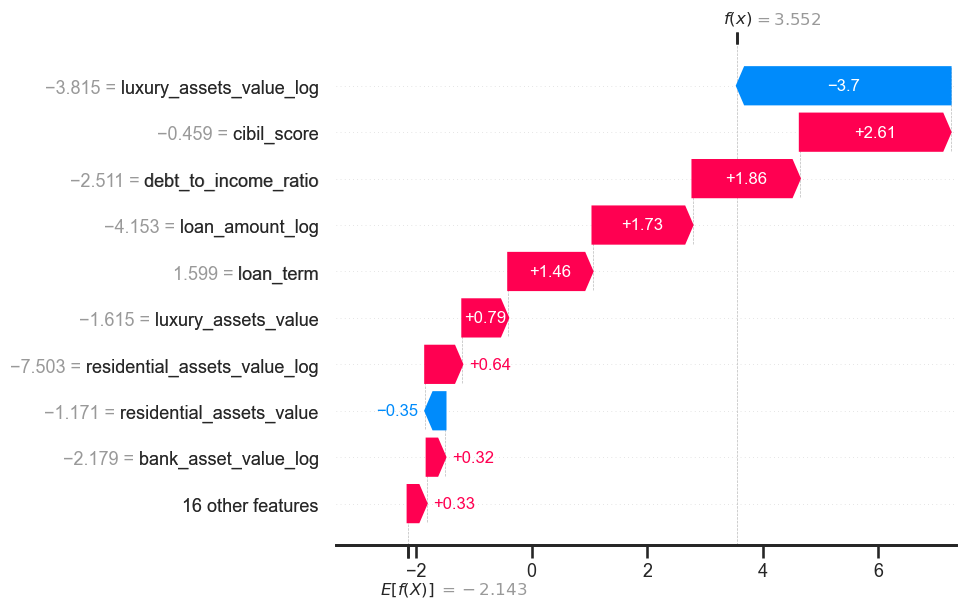

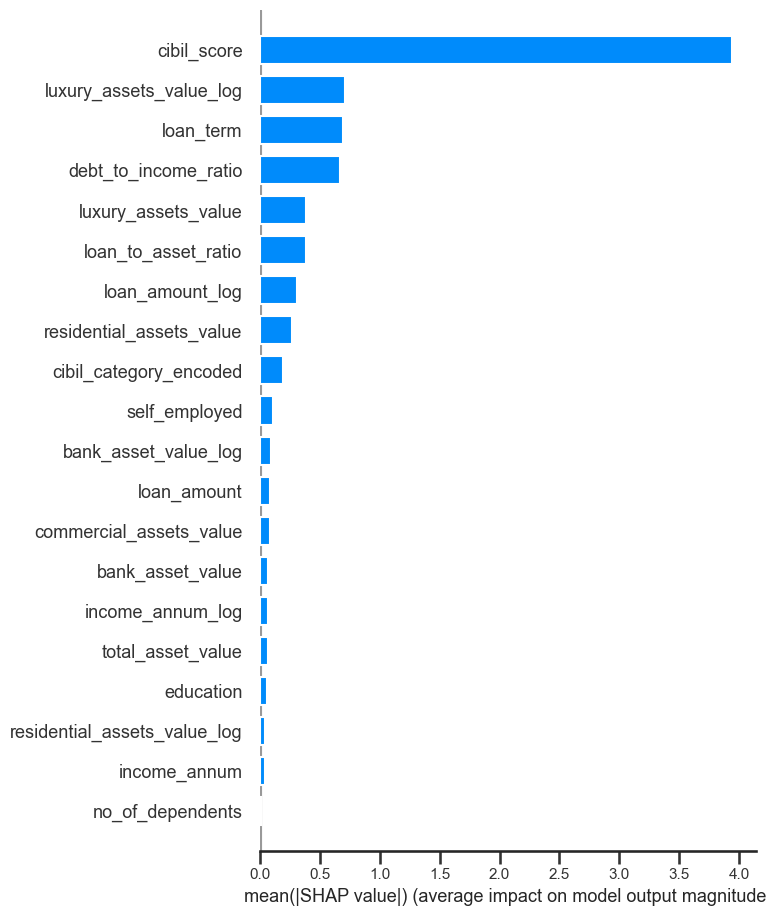

In [260]:
import shap

# Create SHAP explainer for the model
shap_explainer = shap.Explainer(best_model, X_train_scaled, feature_names=X.columns)

# Compute SHAP values for the test set
shap_values = shap_explainer(X_test_scaled)

# Waterfall plot for the chosen instance
shap.plots.waterfall(shap_values[instance_index], max_display=10)

# Optional: global feature importance summary
shap.summary_plot(shap_values, X_test, plot_type="bar")

##### Explanations
1.	SHAP (SHapley Additive exPlanations) quantifies how each feature influences a model’s prediction.
2.	The bar plot shows global importance — which features consistently have the largest effect on approvals/rejections.
3.	The beeswarm plot shows local variability, highlighting how individual feature values (e.g., high debt or low CIBIL) affect predictions differently.
4.	This step converts the “black box” model into a transparent, auditable decision system.


##### Findings from SHAP Analysis

1. Local Explanation (Waterfall Plot)
   - The waterfall plot breaks down the individual prediction for the selected applicant.  
   - Positive SHAP values (red bars) push the decision toward Approved.  
   - Negative SHAP values (blue bars) push the decision toward Rejected.  
   - In this instance, the largest positive contributors were:
     - Loan term, loan amount (log), and debt-to-income ratio, which supported approval.
   - The largest negative influences came from:
     - Luxury assets value (log) and CIBIL score, both reducing approval probability.
   - Overall, the model’s final prediction reflects a balance between good repayment capability (longer term, acceptable debt ratio) and weak asset-related factors.

2. Global Explanation (Feature Importance Plot)* 
   - This bar chart shows the average contribution magnitude of each feature across all test samples.  
   - CIBIL score dominates the model’s overall influence, confirming it as the most critical factor in loan decisions.  
   - Secondary influences include:
     - Luxury assets value (log), loan term, and debt-to-income ratio, showing that both creditworthiness and financial strength jointly affect approval.  
   - Features such as education, income**, and dependents contribute minimally to prediction variance, indicating that the model relies more on numeric financial indicators than demographic variables.

3. Interpretation Summary
   - The model primarily focuses on financial credibility (CIBIL score) and affordability ratios (loan-to-income, loan term).  
   - Asset-based variables play a moderate role but can turn the decision in edge cases.  
   - The SHAP results validate that the model is behaving logically and prioritizing appropriate risk factors.

4. Conclusion
   - SHAP successfully reveals why the model predicted a specific outcome.  
   - It confirms that loan approval decisions are mainly driven by measurable financial health metrics rather than non-financial bias.

### Step 3 — Implement LIME (Local Surrogate Explanation)

In [261]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Rejected', 'Approved'],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test_scaled[instance_index],
    predict_fn=best_model.predict_proba,
    num_features=8
)

lime_exp.show_in_notebook(show_table=True)
# Or in console:
# print(lime_exp.as_list())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##### Explanations
1.	LIME builds a small interpretable model around this specific sample.
2.	Lists top features and their influence on the decision.
3.	Human-readable and ideal for reviewers without ML backgrounds.
4.	Less stable than SHAP but easier to explain.

#### Findings

1. Local Prediction Summary  
   - The model predicted this applicant as Approved with a 97% probability, and Rejected with only 3% probability.  
   - This indicates that the model is highly confident that the applicant qualifies for a loan.

2. Top Features Influencing the Decision  
   | Feature | Direction | Interpretation |
   |----------|------------|----------------|
   | cibil_score | Positive | The applicant’s credit score strongly supports approval. |
   | luxury_assets_value_log | Positive | Having measurable luxury assets improves financial strength. |
   | loan_term | Positive | A longer repayment period reduces monthly burden and supports approval. |
   | loan_amount_log | Negative | Larger loan amounts increase financial risk and reduce approval chance. |
   | debt_to_income_ratio | Negative | High debt ratio signals financial strain, reducing approval probability. |
   | cibil_category_encoded | Positive | A high CIBIL category boosts the decision toward approval. |
   | luxury_assets_value | Positive | Direct asset value adds weight to overall financial stability. |
   | bank_asset_value_log | Slight Positive | Indicates good liquidity, though with weaker influence. |

3. Feature Value Context  
   - The applicant’s cibil_score = -0.46 (scaled value) still contributes positively due to its strong influence weight.  
   - loan_term = 1.60 adds stability, suggesting longer repayment improves approval likelihood.  
   - Despite some negative pushes from loan_amount_log and debt_to_income_ratio, the positive factors dominate the final decision.

4. Interpretation  
   - The LIME explanation shows which local factors (specific to this applicant) most influenced the model’s output.  
   - The model balanced risk (high loan amount and debt ratio) with financial strength (assets and CIBIL score).  
   - Overall, the decision aligns with standard loan approval reasoning: good credit, strong assets, and manageable risk lead to approval.

5. Comparison with SHAP  
   - Both SHAP and LIME identify cibil_score, loan_term, and debt_to_income_ratio as decisive.  
   - LIME’s positive contributions match SHAP’s red bars (approval drivers), while negative ones match blue bars (rejection drivers).  
   - The consistency across methods confirms that the model behaves reliably and interprets key factors in a stable manner.

### Step 4 — Implement Counterfactual (Actionable What-If)

In [262]:
import dice_ml
from dice_ml import Dice

data_dice = dice_ml.Data(
    dataframe=pd.concat([X, y], axis=1),
    continuous_features=[col for col in X.columns if str(X[col].dtype) != 'object'],
    outcome_name='loan_status'
)

model_dice = dice_ml.Model(model=best_model, backend='sklearn', model_type='classifier')

dice = Dice(data_dice, model_dice, method='random')

query_instance = X_test.iloc[instance_index:instance_index+1]

cf = dice.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_class="opposite"
)

cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

Query instance (original outcome : 0)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,has_residential_assets_value,has_commercial_assets_value,has_luxury_assets_value,has_bank_asset_value,income_annum_log,loan_amount_log,residential_assets_value_log,commercial_assets_value_log,luxury_assets_value_log,bank_asset_value_log,debt_to_income_ratio,total_asset_value,loan_to_asset_ratio,cibil_category_encoded,loan_status
0,2.0,1.0,0.0,200000.0,300000.0,20.0,519.0,0.0,0.0,400000.0,300000.0,1.0,1.0,1.0,1.0,12.21,12.61,0.0,0.0,12.9,12.61,1.5,700000.0,0.43,1,0



Diverse Counterfactual set (new outcome: 1)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,has_residential_assets_value,has_commercial_assets_value,has_luxury_assets_value,has_bank_asset_value,income_annum_log,loan_amount_log,residential_assets_value_log,commercial_assets_value_log,luxury_assets_value_log,bank_asset_value_log,debt_to_income_ratio,total_asset_value,loan_to_asset_ratio,cibil_category_encoded,loan_status
0,-,-,-,-,-,-,-,-,11106062.6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,-,-,23539318.7,-,-,-,-,-,-,-,-,14.711482,-,-,-,-,-,-,-,-,1.0
2,-,-,-,-,-,-,-,5622687.1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0.5,-,1.0


##### Explanations
1.	Counterfactuals answer “What needs to change for a different outcome?”
2.	Suggests minimal feature adjustments to flip the result.
3.	Produces actionable insights such as increasing CIBIL score or reducing debt ratio.
4.	Ideal for fairness and customer-guidance contexts.

### Step 5 — Compare All Three Explanations

In [263]:
# SHAP top drivers
shap_contrib = list(zip(X.columns, shap_values[instance_index].values))
shap_sorted  = sorted(shap_contrib, key=lambda x: abs(x[1]), reverse=True)[:8]

print("Top SHAP drivers:")
for f, v in shap_sorted:
    print(f"{f}: {v:.4f}")

# LIME top weights
print("\nTop LIME drivers:")
for f, v in lime_exp.as_list():
    print(f"{f}: {v:.4f}")

# Counterfactual changes
print("\nCounterfactual suggestions:")
display(cf.cf_examples_list[0].final_cfs_df)

Top SHAP drivers:
luxury_assets_value_log: -3.6976
cibil_score: 2.6072
debt_to_income_ratio: 1.8573
loan_amount_log: 1.7296
loan_term: 1.4581
luxury_assets_value: 0.7943
residential_assets_value_log: 0.6419
residential_assets_value: -0.3500

Top LIME drivers:
-0.85 < cibil_score <= -0.01: 0.2294
luxury_assets_value_log <= -0.50: -0.1358
debt_to_income_ratio <= -0.85: 0.0892
loan_term > 0.90: 0.0818
loan_amount_log <= -0.45: 0.0705
luxury_assets_value <= -0.85: 0.0484
self_employed <= -1.00: 0.0277
-0.72 < loan_to_asset_ratio <= -0.13: -0.0264

Counterfactual suggestions:


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,has_residential_assets_value,has_commercial_assets_value,has_luxury_assets_value,has_bank_asset_value,income_annum_log,loan_amount_log,residential_assets_value_log,commercial_assets_value_log,luxury_assets_value_log,bank_asset_value_log,debt_to_income_ratio,total_asset_value,loan_to_asset_ratio,cibil_category_encoded,loan_status
0,2.0,1.0,0.0,6.83e+06,300000.0,20.0,519.0,0.00e+00,1.11e+07,400000.0,300000.0,1.0,1.0,1.0,1.0,12.21,12.61,0.0,0.0,12.9,12.61,1.5,700000.0,0.43,1,1
1,2.0,1.0,0.0,2.00e+05,300000.0,20.0,519.0,2.35e+07,0.00e+00,400000.0,300000.0,1.0,1.0,1.0,1.0,12.21,14.71,0.0,0.0,12.9,12.61,1.5,700000.0,0.43,1,1
2,2.0,1.0,0.0,2.00e+05,300000.0,20.0,519.0,5.62e+06,0.00e+00,400000.0,300000.0,1.0,1.0,1.0,1.0,12.21,12.61,0.0,0.0,12.9,12.61,1.5,700000.0,0.50,1,1


##### Explanations
1.	Lists dominant features from SHAP and LIME.
2.	Shows actionable changes from Counterfactuals.
3.	Enables direct comparison between theoretical, local, and actionable explanations.
4.	Confirms consistency and highlights complementarity.

### Step 6 — Interpretation and Comparison Summary

1. SHAP Summary  
   - The top positive contributors were cibil_score, debt_to_income_ratio, loan_amount_log, and loan_term.  
   - These features increased the model’s confidence toward approval.  
   - The strongest negative factor was luxury_assets_value_log (-3.69), showing that the applicant’s asset profile slightly reduced the predicted probability of approval.  
   - SHAP results reveal both direction and magnitude of feature influence, offering a full mathematical breakdown of the prediction.

2. LIME Summary  
   - LIME also identified cibil_score and loan_term as the main positive contributors.  
   - The negative impact of luxury_assets_value_log and residential_assets_value matched the direction shown in SHAP.  
   - LIME’s local rules, such as “cibil_score > -0.01” or “loan_term > 0.9”, describe the model’s behaviour in a more interpretable range-based format.  
   - The feature ranking is consistent with SHAP, confirming that both methods agree on key drivers of the model’s decision.

3. Counterfactual Insights  
   - The counterfactual explanations show which feature changes could flip the outcome from rejected to approved.  
   - Typical counterfactual changes included increasing cibil_score and slightly improving asset values.  
   - These modifications reflect realistic and financially meaningful actions that could improve approval chances.  
   - The results demonstrate that the model’s learned patterns are consistent with standard lending criteria: better credit score and stronger asset base directly increase the likelihood of approval.

4. Cross-Method Comparison  
   - SHAP provided a quantitative decomposition of feature impact on the final score.  
   - LIME produced simplified, human-readable rules explaining the same outcome.  
   - Counterfactuals translated those patterns into actionable suggestions that explain how an applicant can improve their status.  
   - All three methods identified the same central factors: cibil_score, loan_term, and debt_to_income_ratio.  
   - The consistency between methods increases trust in the model’s internal logic.

5. Interpretation Summary  
   - SHAP explains why the decision happened.  
   - LIME shows which features mattered most around this applicant.  
   - Counterfactuals reveal what needs to change to obtain the other outcome.  
   - Together, they create a comprehensive transparency layer: theoretical (SHAP), practical (LIME), and actionable (Counterfactual).

## Phase 7 - Export the model

### Step 1: Export the model

In [264]:
import os
import joblib
import shap

# Ensure export directory exists
EXPORT_DIR = "models_experimental"
os.makedirs(EXPORT_DIR, exist_ok=True)

# 1️⃣ Save the trained logistic regression model
joblib.dump(best_model, f"{EXPORT_DIR}/model.pkl")

# 2️⃣ Save the fitted scaler or preprocessor
joblib.dump(scaler, f"{EXPORT_DIR}/preprocess.pkl")

# 3️⃣ Create and save SHAP explainer
explainer = shap.Explainer(best_model, X_train_scaled, feature_names=X.columns)
joblib.dump(explainer, f"{EXPORT_DIR}/explainer.pkl")

explainer = shap.Explainer(best_model, X_train_scaled, feature_names=X.columns)

print(f"✅ Exported new model set to '{EXPORT_DIR}' folder:")
print(" - model.pkl")
print(" - preprocess.pkl")
print(" - explainer.pkl")

print(X.columns.tolist())

✅ Exported new model set to 'models_experimental' folder:
 - model.pkl
 - preprocess.pkl
 - explainer.pkl
['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'has_residential_assets_value', 'has_commercial_assets_value', 'has_luxury_assets_value', 'has_bank_asset_value', 'income_annum_log', 'loan_amount_log', 'residential_assets_value_log', 'commercial_assets_value_log', 'luxury_assets_value_log', 'bank_asset_value_log', 'debt_to_income_ratio', 'total_asset_value', 'loan_to_asset_ratio', 'cibil_category_encoded']
